In [182]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [183]:
df = pd.read_csv('dataset/winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [184]:
# there are no categorical variables. each feature is a number. Regression problem. 
# Given the set of values for features, we have to predict the quality of wine. finding correlation of each feature with our target variable - quality
#for col in df.columns:
 #   if df[col].isnull().sum() > 0:
  #      df[col] = df[col].fillna(df[col].mean())

#df.isnull().sum().sum()

correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


In [199]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,best quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,0.996747,3.311113,0.658149,10.422983,5.636023,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


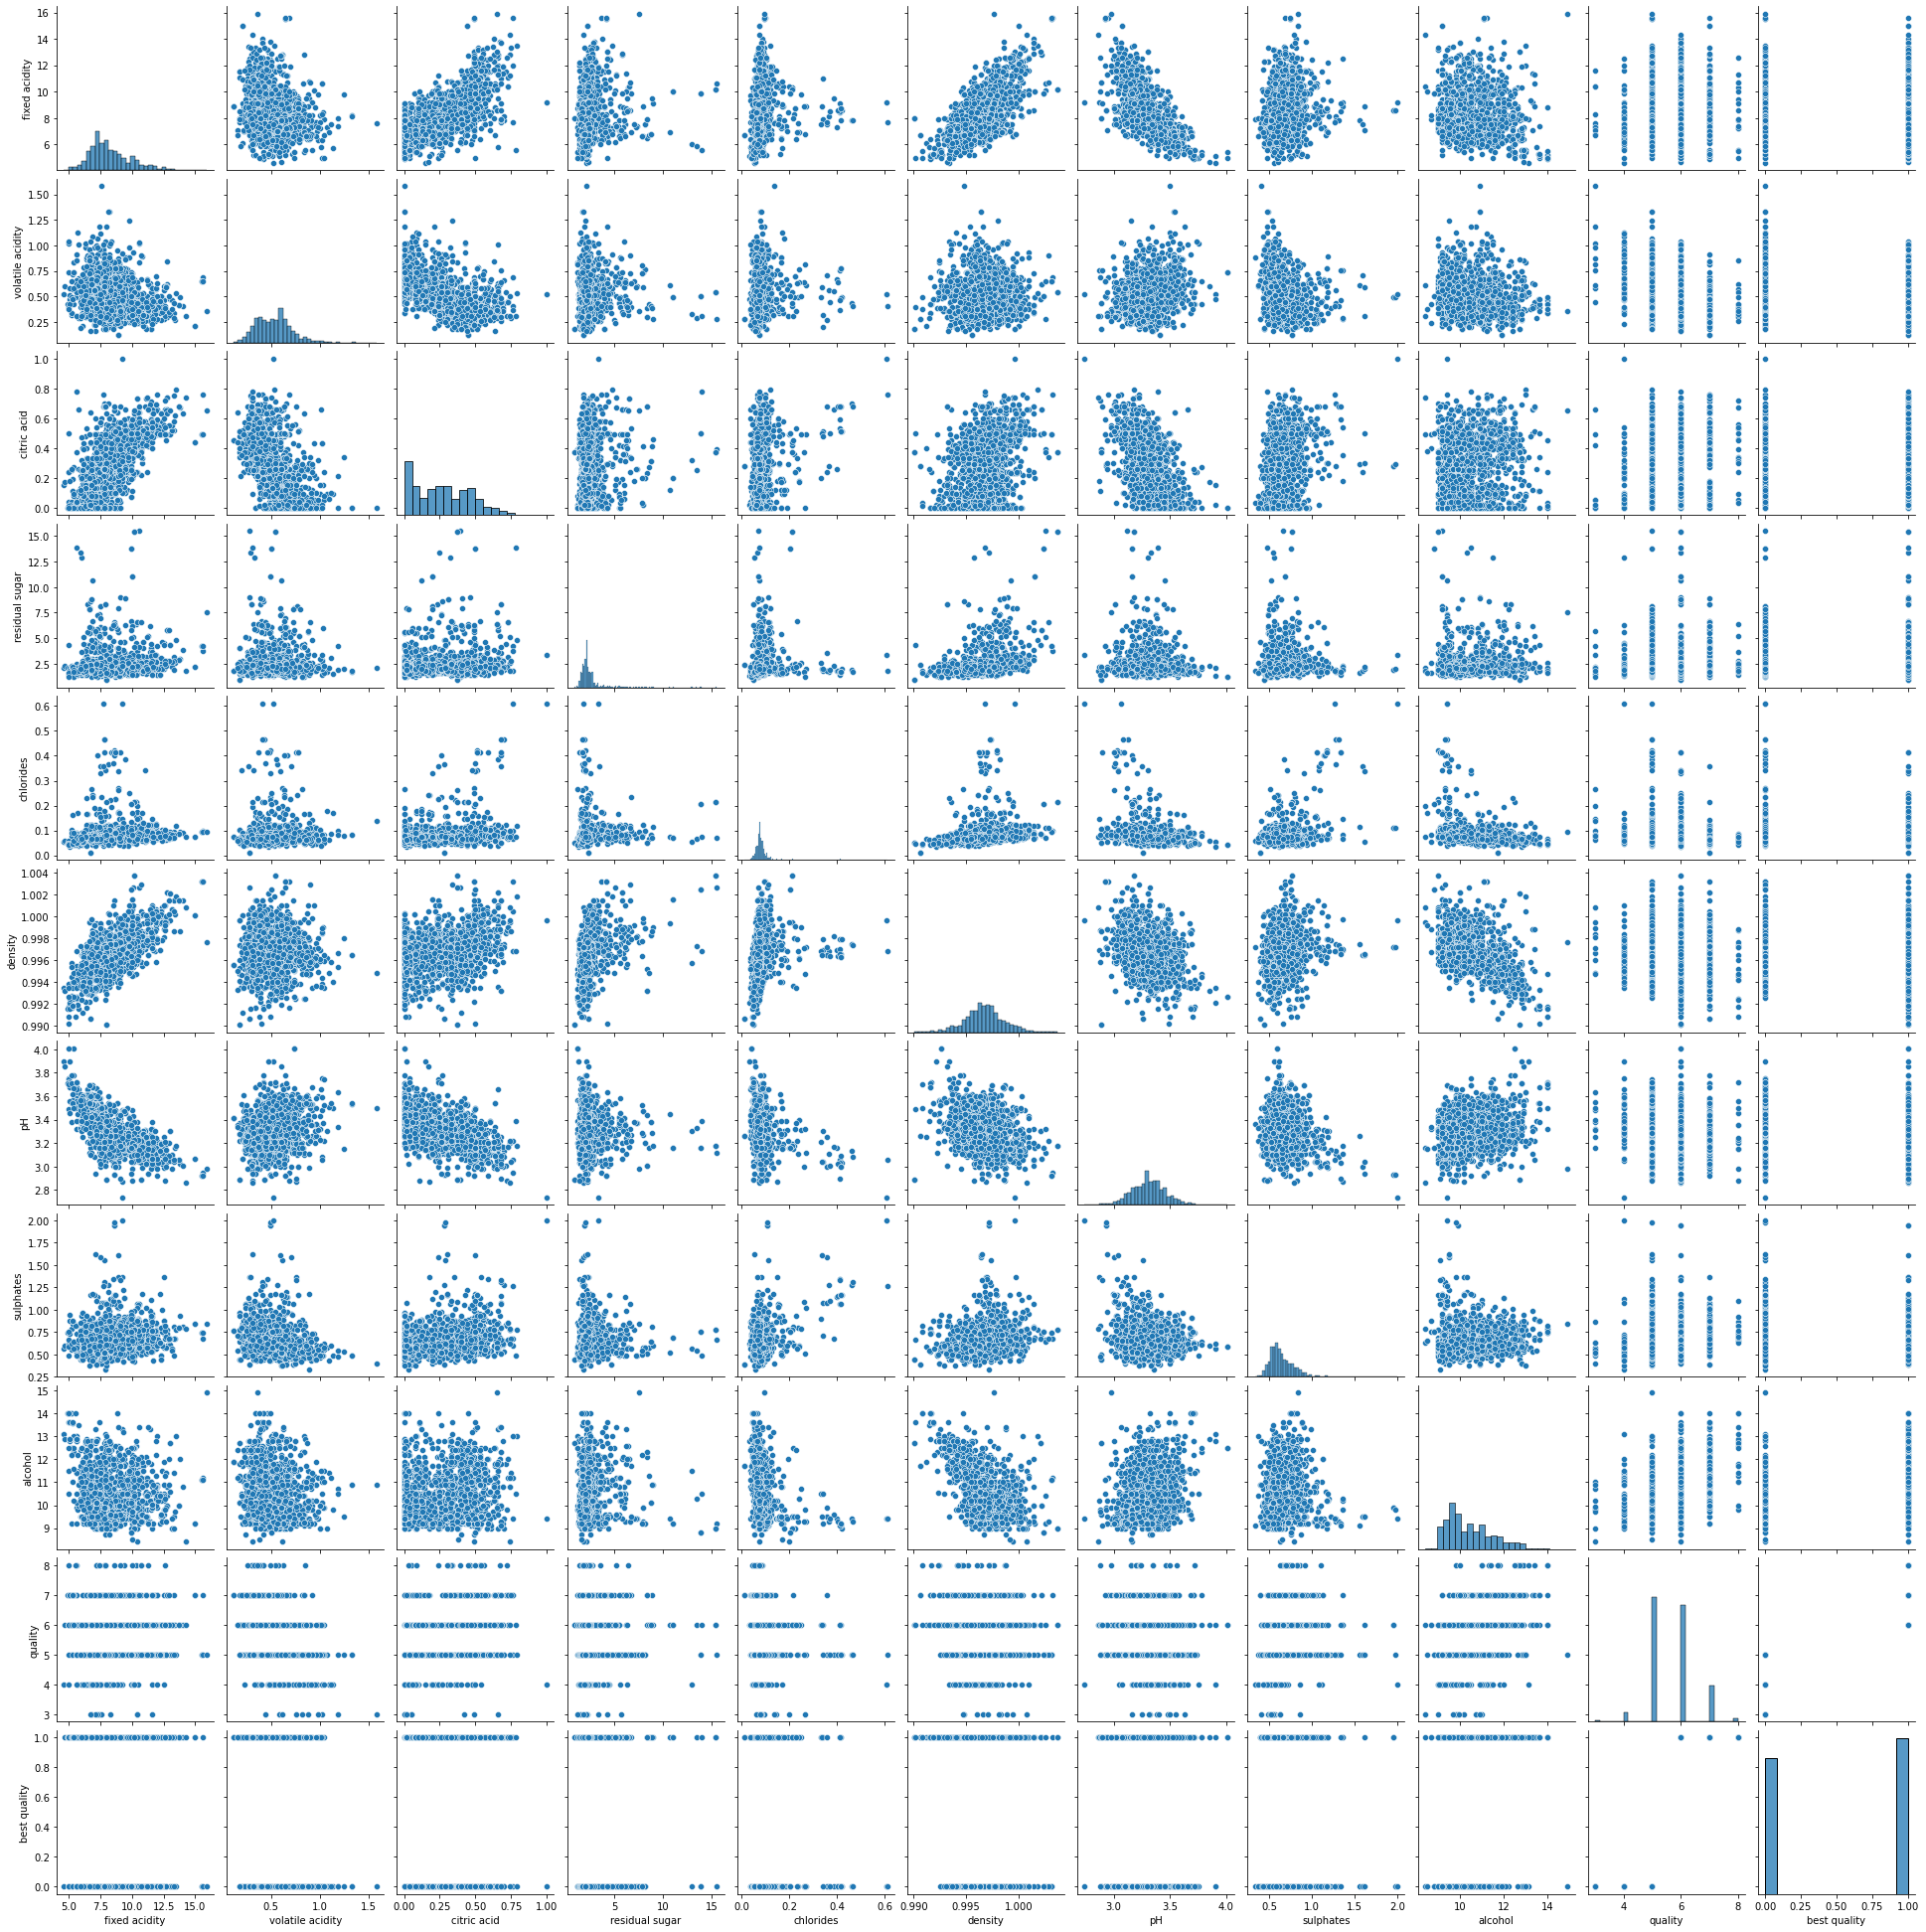

In [205]:
sns.pairplot(df) 
plt.show()

<AxesSubplot:>

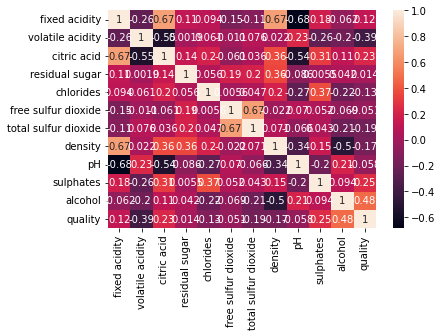

In [186]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [187]:
#From the above heat map we can conclude that the ‘total sulphur dioxide’ and ‘free sulphur dioxide‘ are highly correlated features so, we will remove them.
df = df.drop('total sulfur dioxide', axis=1)
df = df.drop('free sulfur dioxide', axis=1)

In [188]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]
df.replace({'white': 1, 'red': 0}, inplace=True)


In [189]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1279, 9), (320, 9), (1279,), (320,))

In [190]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)
print(y_train)


919     1
223     1
994     0
918     1
1171    1
       ..
1016    1
165     0
7       1
219     0
1350    0
Name: best quality, Length: 1279, dtype: int64


In [191]:
# fitting linear regression to training data
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [207]:
train_pred = regressor.predict(X_train)
print(train_pred)

[0.90499806 0.36071747 0.34831098 ... 0.39212159 0.31130089 0.42309079]
